In [56]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [57]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [58]:
X_train = X_train/255 #Scaling the values between 0-1 for better accuracy
X_test = X_test/255   #Scaling the values between 0-1 for better accuracy

X_train_flattened = X_train.reshape(len(X_train), 28*28)  #Converting from 2D to 1D array to feed into first layer neurons
X_test_flattened = X_test.reshape(len(X_test), 28*28)     #Converting from 2D to 1D array to feed into first layer neurons

In [59]:
#Creating neural network with 2 hidden layers
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3413 - accuracy: 0.9009
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0834 - accuracy: 0.9749
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9911


In [60]:
#Checking accuracy of model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9758


[0.08507353067398071, 0.9757999777793884]

7

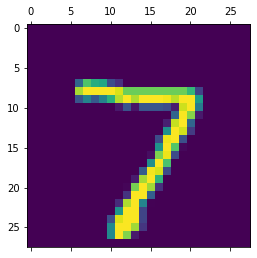

In [61]:
#Predicting values
plt.matshow(X_test[0])
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])

Text(69.0, 0.5, 'True Value')

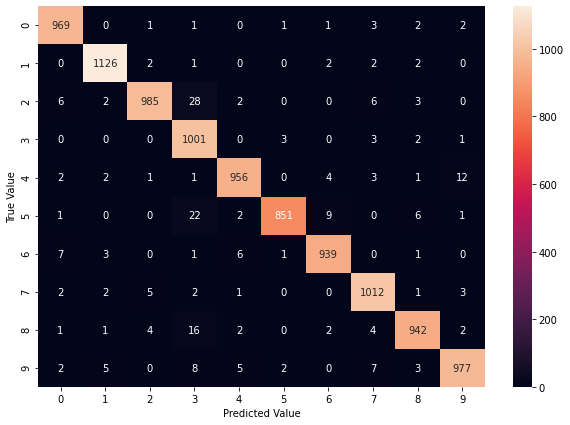

In [62]:
#Creating a confusion matrix for exploring data
y_predicted_labels = [np.argmax(i) for i in y_predicted]

confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')